#Q1. Import the necessary libraries

In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np
# to handle data in form of rows and columns
import pandas as pd 
# importing plotting libraries
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns
# Importing Logistic Libraries 
from sklearn.linear_model import LogisticRegression
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#To import KNN Clasifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
#To import randomForest Clasifier Algorithm
from sklearn.ensemble import RandomForestClassifier
#To import GradientBoosting Clasifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier
#To import Ada Boosting Clasifier Algorithm
from sklearn.ensemble import AdaBoostClassifier
#To import Decission Tree Clasifier Algorithm
from sklearn.tree import DecisionTreeClassifier
#To import Metrics fromsklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Q2. Read the data as a data frame

In [4]:
prj3_df_org = pd.read_excel("Project\\bankfull.xlsx")
prj3_df = prj3_df_org
prj3_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Q3. Perform basic EDA which should include the following and print out your insights at every step

#a. Shape of the data

In [5]:
prj3_df.shape

(45211, 17)

#b. Data type of each attribute

In [6]:
prj3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
prj3_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#c. Checking the presence of missing values

In [8]:
prj3_df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
prj3_df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
prj3_df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
prj3_df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [12]:
prj3_df.balance.value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
 5         113
 6          88
 8          81
 23         75
 10         69
 7          69
 11         65
 25         63
 20         62
 19         60
 15         59
 47         59
 21         59
 49         59
 33         58
 13         57
 53         56
 16         56
 24         55
 79         55
 91         54
 145        54
 46         54
 9          54
 14         53
          ... 
 6205        1
 6320        1
 4394        1
 2327        1
 4404        1
 8460        1
 29312       1
 4362        1
-2049        1
 17332       1
 2633        1
 6571        1
 1338        1
-568         1
 8402        1
 8863        1
 10451       1
 29184       1
 13242       1
 4586        1
 51439       1
 4092        1
-472         1
 8652        1
 4554        1
 4305        1
 6352        1
 18881       1
 14889       1
 7218        1
Name: balance, Length: 7168, dtype: int64

In [13]:
prj3_df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [14]:
prj3_df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [15]:
prj3_df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [16]:
prj3_df.duration.value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [17]:
prj3_df.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [18]:
prj3_df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [19]:
prj3_df.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [20]:
prj3_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
prj3_df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#d. 5 point summary of numerical attributes

The below Attributes are Numarical variables:
age           
balance       
day           
duration      
campaign      
pdays         
previous
5 Point summary of the Numarical variables are as follows:

In [22]:
N_Variables_Df =prj3_df[['age','balance','day','duration','campaign','pdays','previous' ]]
N_Variables_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#min,25%,Median,75% and Max are 5 point Analysis for our data.

#e. Checking the presence of outliers

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


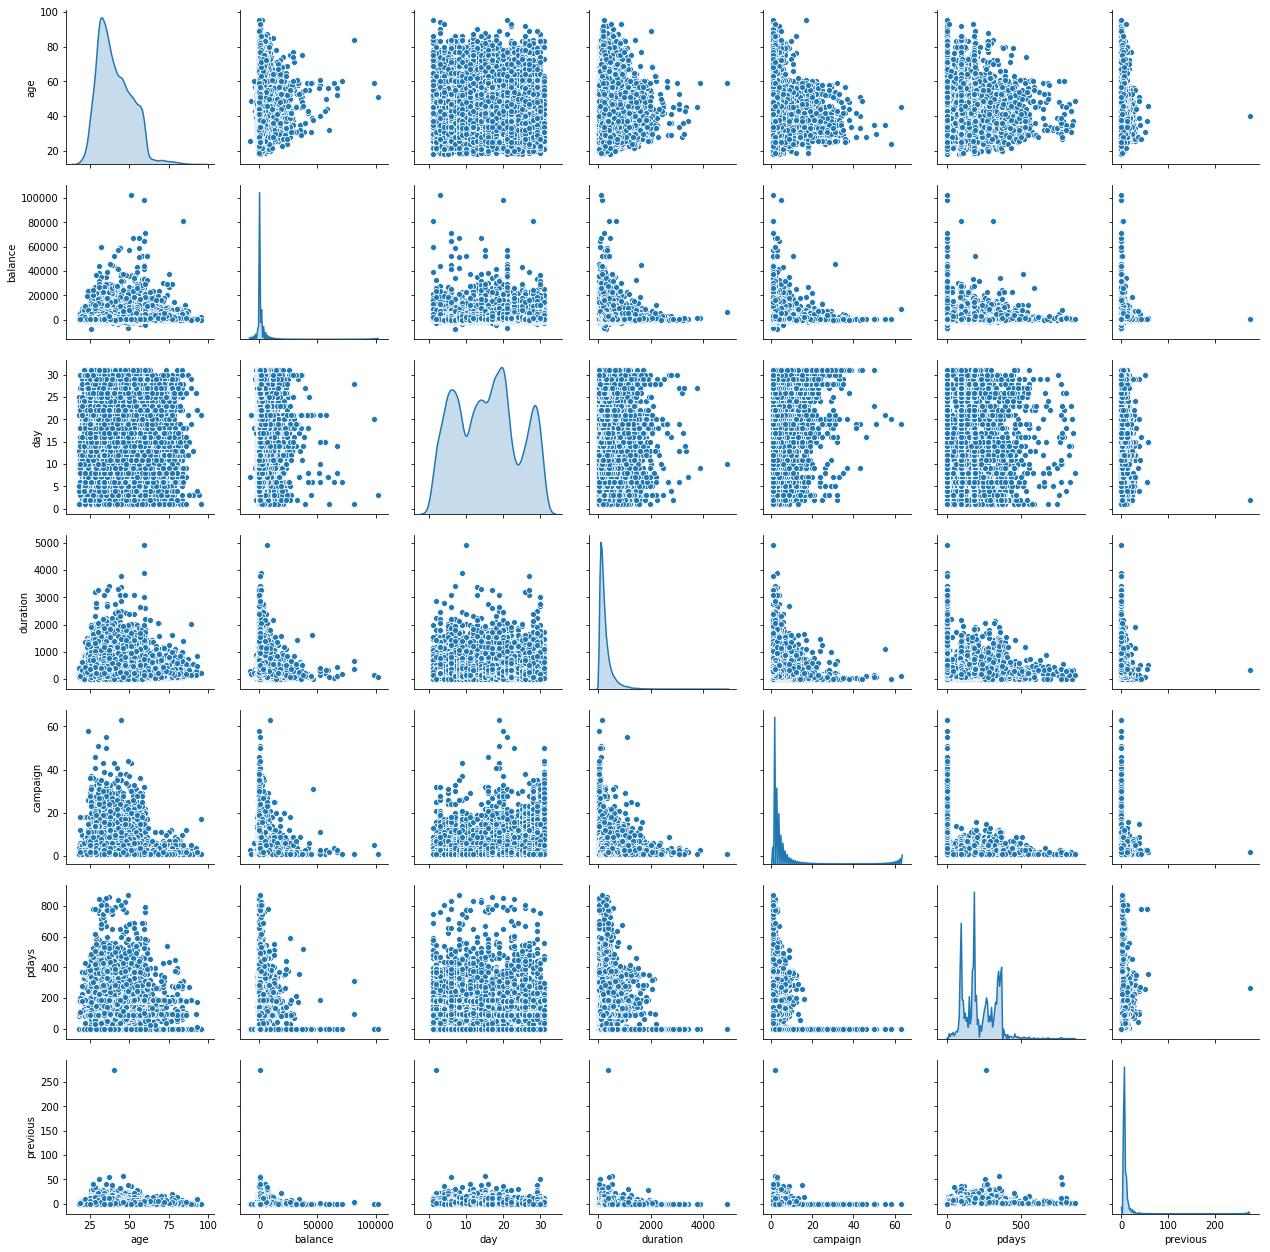

In [23]:
# The Bivariate/correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view
prj3_df_attr = prj3_df.iloc[:,0:18]
sns.pairplot(prj3_df_attr, diag_kind='kde') # To plot density curve instead of histogram

#The below outliers were identified.
#1. There are some Negative Values in the Balance. Assuming that they are typo errors and taking as +ve Values.
#2. There are 36954 rows are having -1 for pdays and assuming them as null, and replaced with Median
#3. There are 36954 rows are having 0 for asuming as previous may be depend on pdays, and replaced with its Median #Value.
#Imputing these values to the data_frame
#.Assumkng that the extream values are not outliers.

#Q4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [24]:
pdayss_d = prj3_df.pdays==-1
k=prj3_df[~pdayss_d]
pdays_median=k['pdays'].median()
pdays_median

194.0

In [25]:
previous_d = prj3_df.previous == 0
prv=prj3_df[~previous_d]
prv_median=k['previous'].median()
prv_median

2.0

In [26]:
prj3_df=prj3_df.replace(to_replace = -0,value = prv_median )

In [27]:
prj3_df.previous.value_counts()

2      39060
1       2772
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
29         4
25         4
21         4
30         3
38         2
37         2
26         2
28         2
40         1
41         1
51         1
275        1
55         1
35         1
58         1
32         1
Name: previous, dtype: int64

In [28]:
prj3_df=prj3_df.replace(to_replace = -1,value =pdays_median ) 

In [29]:
prj3_df.pdays.value_counts()

194    36969
182      167
92       147
183      126
91       126
181      117
370       99
184       85
364       77
95        74
350       73
94        72
175       71
185       68
343       65
93        65
188       64
189       60
186       60
174       57
96        57
349       57
363       55
90        54
97        54
196       51
365       51
357       49
98        49
342       49
       ...  
774        1
550        1
396        1
492        1
466        1
45         1
434        1
18         1
529        1
465        1
401        1
784        1
656        1
592        1
528        1
464        1
432        1
655        1
495        1
543        1
47         1
782        1
686        1
558        1
526        1
749        1
717        1
589        1
493        1
32         1
Name: pdays, Length: 558, dtype: int64

In [30]:
N_Variables_Df =prj3_df[['age','balance','day','duration','campaign','pdays','previous' ]]
N_Variables_Df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.643162,3044.606647,-8019.0,74.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163212,257.527680,1.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,199.584482,50.686537,1.0,194.0,194.0,194.0,871.0
previous,45211.0,2.215058,2.001393,1.0,2.0,2.0,2.0,275.0


In [31]:
prj3_df.balance=prj3_df.balance.abs() 
prj3_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,194,2,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,194,2,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,194,2,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,194,2,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,194,2,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,194,2,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,194,2,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,194,2,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,194,2,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,194,2,unknown,no


In [32]:
prj3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1415.564973,3020.363981,1.0,138.0,485.0,1436.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163212,257.527680,1.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,199.584482,50.686537,1.0,194.0,194.0,194.0,871.0
previous,45211.0,2.215058,2.001393,1.0,2.0,2.0,2.0,275.0


In [33]:
cat_col = []  # list to hold the categorical features
for i in prj3_df.columns:  # Loop to go through each and every column name
    if prj3_df[i].dtype == object:  # check if the column is of object type
        cat_col.append(i)  # append the ones that satisfy above condition to the list
    prj3_df.loc[0:3, cat_col]
for i in cat_col:
    print(f'Number of categories in {i} = {len(prj3_df[i].unique())}')

Number of categories in job = 12
Number of categories in marital = 3
Number of categories in education = 4
Number of categories in default = 2
Number of categories in housing = 2
Number of categories in loan = 2
Number of categories in contact = 3
Number of categories in month = 12
Number of categories in poutcome = 4
Number of categories in Target = 2


In [34]:

from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    encoder = LabelEncoder()
    prj3_df[i] = encoder.fit_transform(prj3_df[i])

In [35]:
prj3_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,194,2,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,194,2,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,194,2,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,194,2,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,194,2,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,194,2,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,194,2,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,194,2,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,194,2,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,194,2,3,0


In [36]:
prj3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1415.564973,3020.363981,1.0,138.0,485.0,1436.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [37]:
# Group: job vs Target
Group=prj3_df.groupby(['job'])['Target'].count().sort_values(ascending=False)
Group.head(10)

job
1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
Name: Target, dtype: int64

In [38]:
# Group: balance vs Target
Group=prj3_df.groupby(['balance'])['Target'].count().sort_values(ascending=False)
Group.head(10)

balance
2      3695
1       195
3       156
4       154
5       125
6       102
194      91
8        90
23       85
7        82
Name: Target, dtype: int64

In [39]:
# Group: loan vs Target
Group=prj3_df.groupby(['loan'])['Target'].count().sort_values(ascending=False)
Group

loan
0    37967
1     7244
Name: Target, dtype: int64

In [40]:
# Group: loan vs Target
Group=prj3_df.groupby(['campaign'])['Target'].count().sort_values(ascending=False)
Group

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
50        2
37        2
41        2
55        1
51        1
58        1
46        1
44        1
39        1
63        1
Name: Target, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


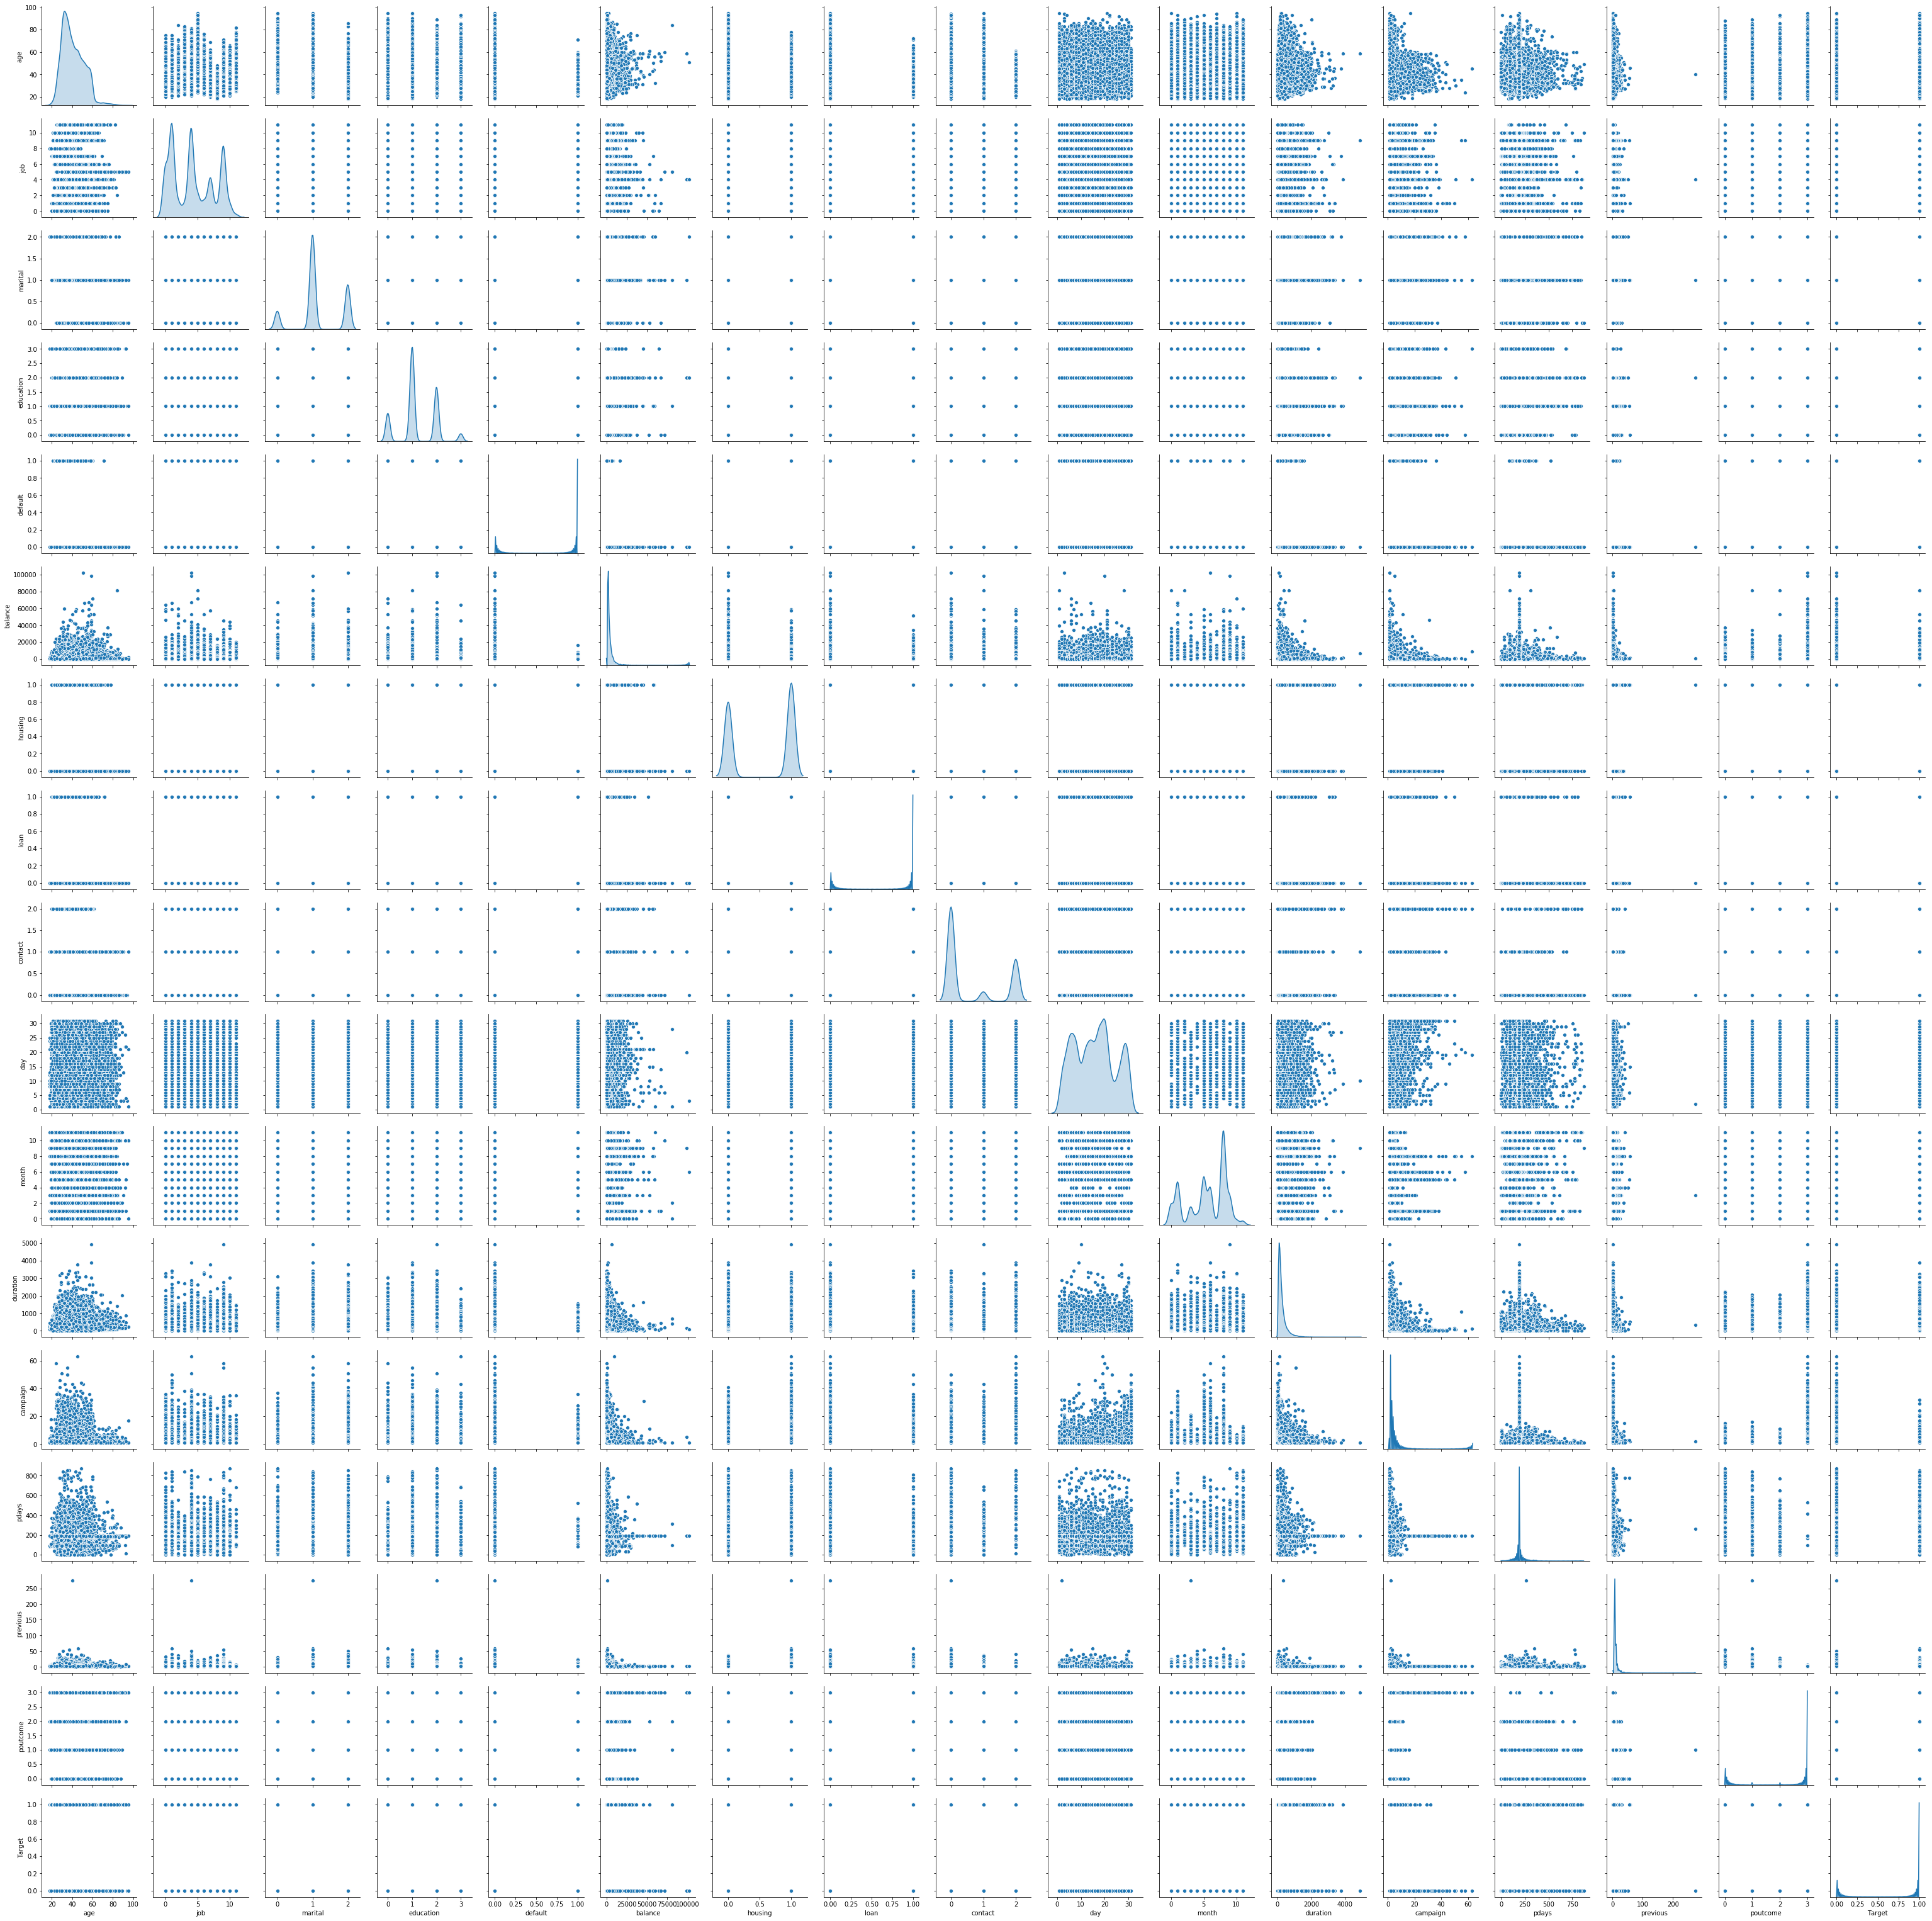

In [41]:
# The Bivariate/correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view
prj3_df_attr = prj3_df.iloc[:,0:18]
sns.pairplot(prj3_df_attr, diag_kind='kde') # To plot density curve instead of histogram

In [42]:
def correlation_plot(df):
    corr = abs(prj3_df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap
    plt.figure(figsize = (9,5))  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Reds', xticklabels = corr.index,yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()

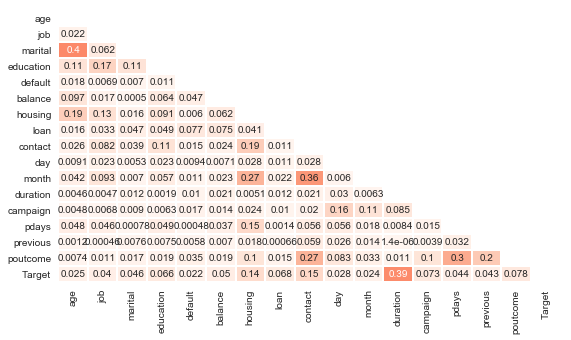

In [43]:
correlation_plot(prj3_df)

#Apart form duration all other columns are eenly distributed.
#Max value - 3rd quartile for BALANCE is 100691. May be a outlier caused right skewmnness. assumed that its not a outlier so kept for anaLYSIS.
#Max value - 3rd quartile for duration is 4599 May be a outlier caused right skewmnness. assumed that its not a #outlier so kept for anaLYSIS.
#pdays is also having little bit right skewness. 
#Actually log values of these will give much performnce, but for current model is a simple one not considering these that. 
#There is no correlation among the variables & with target variable.

In [44]:
prj3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: int64(17)
memory usage: 5.9 MB


#All features are numaric variables.
#There are no null values in the data or negative values there are 3 to 4 values seems to be outliers for balance, duration & pdays. assumed that that they are proper values and kept as part of the data.

In [ ]:
#Pliting the Data Frame into tow data frames for target/independent variables

In [45]:
features = prj3_df.drop(columns= ['Target'])
target = prj3_df.Target

In [46]:
features.shape,target.shape

((45211, 16), (45211,))

#split the data into 70:30 ratio.

In [47]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.3, random_state = 10)

In [48]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

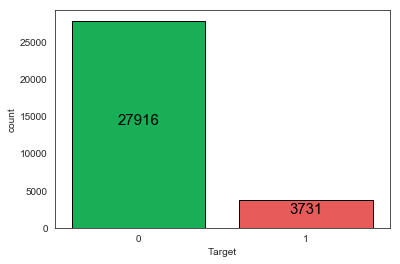

In [49]:
plot = sns.countplot(target_train, edgecolor = 'black', palette = [ '#00C851','#ff4444'])
bars = plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),ha = 'center', fontsize = 15, color = 'black')
plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),ha = 'center', fontsize = 15, color = 'black')
plt.show()

In [ ]:
#Q5. Train a few standard classification algorithms, note and comment on their performances along different metrics

In [50]:
logreg = LogisticRegression()
logreg.fit(features_train, target_train)
lr_score = logreg.score(features_test, target_test)
print(f'Score : {round(lr_score*100,3)}')

Score : 89.067


In [51]:
pred = logreg.predict(features_test)
tn, fp, fn, tp = metrics.confusion_matrix(target_test,pred).ravel()

In [52]:
lr_recall = round(tp/(tp+fn), 3)
lr_precision = round(tp/(tp+fp), 3)
lr_specificity =round(tn/(tn+fp),3) 
type_1_error = fp
type_2_error = fn
lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error

(0.205, 0.566, 0.98, 245, 1238)

In [53]:
dt = DecisionTreeClassifier()
dt.fit(features_train,target_train)
dt_score = dt.score(features_test, target_test)
print(f'Score : {round(dt_score*100,3)}')

Score : 87.349


In [54]:
pred = dt.predict(features_test)
tn, fp, fn, tp = metrics.confusion_matrix(target_test,pred).ravel()

In [55]:
dt_recall = round(tp/(tp+fn), 3)
dt_precision = round(tp/(tp+fp), 3)
dt_specificity =round(tn/(tn+fp),3) 
dt_type_1_error = fp
dt_type_2_error = fn
dt_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error

(0.466, 0.451, 0.926, 884, 832)

In [56]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(features_train, target_train)
rf_score = rf.score(features_test, target_test)
print(f'Score : {round(rf_score*100,3)}')

Score : 89.693


In [57]:
rf_recall = round(tp/(tp+fn), 3)
rf_precision = round(tp/(tp+fp), 3)
rf_specificity =round(tn/(tn+fp),3) 
rf_type_1_error = fp
rf_type_2_error = fn
rf_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error

(0.466, 0.451, 0.926, 884, 832)

#Recall is less for all the Models. score seems to be okay for randomForest.
So instead of Median planned to palce Median. Removing the uotlier values.
pdays and previous are having similarity decided to drop previous feature

In [58]:
prj3_df_mod = prj3_df_org[prj3_df_org.balance != prj3_df_org.balance.max()]

In [59]:
prj3_df_mod.balance.max()

98417

In [60]:
prj3_df_mod.previous.max()

275

In [61]:
prj3_df_mod=prj3_df_mod[prj3_df_mod.previous != prj3_df_mod.previous.max()]

In [62]:
prj3_df_mod.previous.max(),prj3_df_mod.balance.max()

(58, 98417)

In [63]:
pdayss_d = prj3_df_mod.pdays==-1
k=prj3_df_mod[~pdayss_d]
pdays_mean=k['pdays'].mean()
pdays_mean

224.57315891472868

In [64]:
previous_d = prj3_df.previous == 0
prv=prj3_df[~previous_d]
prv_mean=k['previous'].mean()
prv_mean

3.144622093023256

In [65]:
prj3_df_mod=prj3_df_mod.replace(to_replace = -0,value = round(prv_mean,0) )
prj3_df_mod=prj3_df_mod.replace(to_replace = -1,value =round(pdays_mean,0) )
prj3_df_mod.balance=prj3_df_mod.balance.abs() 
prj3_df_mod

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,225,3,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,225,3,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,225,3,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,225,3,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,225,3,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,225,3,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,225,3,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,225,3,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,225,3,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,225,3,unknown,no


In [66]:
cat_col = []  # list to hold the categorical features
for i in prj3_df_mod.columns:  # Loop to go through each and every column name
    if prj3_df_mod[i].dtype == object:  # check if the column is of object type
        cat_col.append(i)  # append the ones that satisfy above condition to the list
    prj3_df_mod.loc[0:3, cat_col]
for i in cat_col:
    print(f'Number of categories in {i} = {len(prj3_df[i].unique())}')

Number of categories in job = 12
Number of categories in marital = 3
Number of categories in education = 4
Number of categories in default = 2
Number of categories in housing = 2
Number of categories in loan = 2
Number of categories in contact = 3
Number of categories in month = 12
Number of categories in poutcome = 4
Number of categories in Target = 2


In [67]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    encoder = LabelEncoder()
    prj3_df_mod[i] = encoder.fit_transform(prj3_df_mod[i])

In [68]:
prj3_df_mod.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45209.0,40.936008,10.618891,18.0,33.0,39.0,48.0,95.0
job,45209.0,4.339777,3.272729,0.0,1.0,4.0,7.0,11.0
marital,45209.0,1.167710,0.608230,0.0,1.0,1.0,2.0,2.0
education,45209.0,1.224778,0.747996,0.0,1.0,1.0,2.0,3.0
default,45209.0,0.018027,0.133052,0.0,0.0,0.0,0.0,1.0
balance,45209.0,1413.468601,2983.005226,1.0,138.0,485.0,1436.0,98417.0
housing,45209.0,0.555841,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45209.0,0.160234,0.366827,0.0,0.0,0.0,0.0,1.0
contact,45209.0,0.640271,0.897961,0.0,0.0,0.0,2.0,2.0
day,45209.0,15.807007,8.322189,1.0,8.0,16.0,21.0,31.0


In [69]:
prj3_df_mod.groupby('Target').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920,39920
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [70]:
prj3_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45210
Data columns (total 17 columns):
age          45209 non-null int64
job          45209 non-null int64
marital      45209 non-null int64
education    45209 non-null int64
default      45209 non-null int64
balance      45209 non-null int64
housing      45209 non-null int64
loan         45209 non-null int64
contact      45209 non-null int64
day          45209 non-null int64
month        45209 non-null int64
duration     45209 non-null int64
campaign     45209 non-null int64
pdays        45209 non-null int64
previous     45209 non-null int64
poutcome     45209 non-null int64
Target       45209 non-null int64
dtypes: int64(17)
memory usage: 7.5 MB


In [85]:
Ensemble_features = prj3_df_mod.drop(columns= ['Target','previous'])
Ensemble_target = prj3_df_mod.Target
Ensemble_features.shape,Ensemble_target.shape

((45209, 15), (45209,))

In [86]:
Ensemble_features_train, Ensemble_features_test, Ensemble_target_train, Ensemble_target_test = train_test_split(Ensemble_features,Ensemble_target, test_size = 0.3, random_state = 10)
Ensemble_features_train.shape, Ensemble_features_test.shape, Ensemble_target_train.shape, Ensemble_target_test.shape

((31646, 15), (13563, 15), (31646,), (13563,))

In [87]:
extra_samples = prj3_df_mod.sample(n = 3000, random_state = 100)
extra_samples_fea = prj3_df_mod.drop(columns= ['Target','previous']).sample(n = 3000,random_state = 100)
Ensemble_target_test = pd.concat([Ensemble_target_test, extra_samples.Target])
Ensemble_features_test = pd.concat([Ensemble_features_test, extra_samples_fea])

In [88]:
Ensemble_features_train.shape, Ensemble_features_test.shape, Ensemble_target_train.shape, Ensemble_target_test.shape

((31646, 15), (16563, 15), (31646,), (16563,))

#Q6. Build the ensemble models - Bagging, Boosting, Random forest etc and compare all the models that have been built so far across different metrics

In [91]:
# Train and evaluate models
### Logistic Regression
logreg = LogisticRegression()
logreg.fit(Ensemble_features_train, Ensemble_target_train)
lr_score = logreg.score(Ensemble_features_test, Ensemble_target_test)
print(f'Score : {round(lr_score*100,3)}')
pred = logreg.predict(Ensemble_features_test)
tn, fp, fn, tp = metrics.confusion_matrix(Ensemble_target_test,pred).ravel()

Score : 88.963


In [92]:
lr_recall = round((tp/(tp+fn)*100),3)
lr_precision = round(tp/(tp+fp)*100, 3)
lr_specificity =round(tn/(tn+fp)*100,3) 
type_1_error = fp
Ensemble_target_testtype_2_error = fn
lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error

(20.686, 59.151, 98.09, 279, 1238)

AUC: 0.860


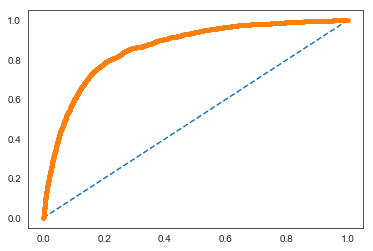

In [93]:
probs = logreg.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [94]:
dt = DecisionTreeClassifier()
dt.fit(Ensemble_features_train,Ensemble_target_train)
dt_score = dt.score(Ensemble_features_test, Ensemble_target_test)
print(f'Score : {round(dt_score*100,3)}')

Score : 88.994


In [95]:
pred = dt.predict(Ensemble_features_test)
tn, fp, fn, tp = metrics.confusion_matrix(Ensemble_target_test,pred).ravel()

In [96]:
dt_recall = round(tp/(tp+fn)*100, 3)
dt_precision = round(tp/(tp+fp)*100, 3)
dt_specificity =round(tn/(tn+fp)*100,3) 
dt_type_1_error = fp
dt_type_2_error = fn
dt_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error

(57.552, 53.069, 93.196, 994, 829)

AUC: 0.754


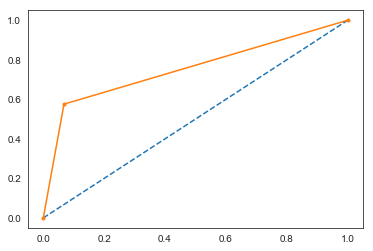

In [97]:
probs = dt.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [99]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(Ensemble_features_train, Ensemble_target_train)
rf_score = rf.score(Ensemble_features_test, Ensemble_target_test)
print(f'Score : {round(rf_score*100,3)}')

Score : 88.674


In [100]:
rf_recall = round(tp/(tp+fn)*100, 3)
rf_precision = round(tp/(tp+fp)*100, 3)
rf_specificity =round(tn/(tn+fp)*100,3) 
rf_type_1_error = fp
rf_type_2_error = fn
rf_recall, rf_precision, rf_specificity, rf_type_1_error, rf_type_2_error

(57.552, 53.069, 93.196, 994, 829)

AUC: 0.903


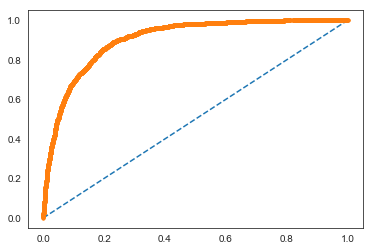

In [101]:
probs = rf.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [127]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)
bgcl = bgcl.fit(Ensemble_features_train, Ensemble_target_train)
bc_score = (bgcl.oob_score_)
print(f'Score : {round(bc_score*100,3)}')

Score : 90.131


In [128]:
bc_recall = round(tp/(tp+fn)*100, 3)
bc_precision = round(tp/(tp+fp)*100, 3)
bc_specificity =round(tn/(tn+fp)*100,3) 
bc_type_1_error = fp
bc_type_2_error = fn
bc_recall, bc_precision, bc_specificity, bc_type_1_error,bc_type_2_error

(39.171, 66.119, 97.317, 392, 1188)

In [ ]:
# Custom function which returns true positive rate
def evaluate(Ensemble_target_true, Ensemble_target_pred):
    tn, fp, fn, tp = metrics.confusion_matrix(Ensemble_target_true, Ensemble_target_pred).ravel()
    true_positive_rate = tp/(tp+fn)
    return true_positive_rate

AUC: 0.935


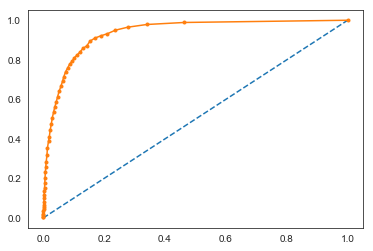

In [130]:
probs = bgcl.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [102]:
ac = AdaBoostClassifier()
ac.fit(Ensemble_features_train, Ensemble_target_train)
ac_score = ac.score(Ensemble_features_test, Ensemble_target_test)
print(f'Score : {round(ac_score*100,3)}')

Score : 89.748


In [114]:
ac_recall = round(tp/(tp+fn)*100, 3)
ac_precision = round(tp/(tp+fp)*100, 3)
ac_specificity =round(tn/(tn+fp)*100,3) 
ac_type_1_error = fp
ac_type_2_error = fn
ac_recall, ac_precision, ac_specificity, ac_type_1_error,ac_type_2_error

(39.171, 66.119, 97.317, 392, 1188)

AUC: 0.907


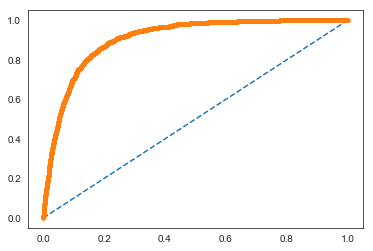

In [103]:
probs = ac.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [111]:
### Gradient Boost
gc = GradientBoostingClassifier()
gc.fit(Ensemble_features_train, Ensemble_target_train)
gc_score = gc.score(Ensemble_features_test, Ensemble_target_test)
print(f'Score : {round(gc_score*100,3)}')
pred = gc.predict(Ensemble_features_test)
tn, fp, fn, tp = metrics.confusion_matrix(Ensemble_target_test,pred).ravel()
gc_recall = round(tp/(tp+fn)*100, 3)
gc_precision = round(tp/(tp+fp)*100, 3)
gc_specificity =round(tn/(tn+fp)*100,3)
gc_type_1_error = fp
gc_type_2_error = fn
gc_recall, gc_precision, gc_specificity, gc_type_1_error, gc_type_2_error

Score : 90.461


(39.171, 66.119, 97.317, 392, 1188)

AUC: 0.926


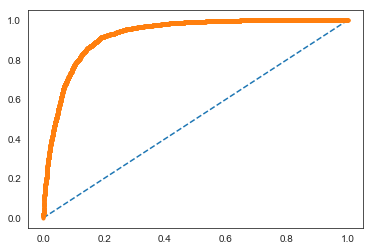

In [118]:
probs = gc.predict_proba(Ensemble_features_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Ensemble_target_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ensemble_target_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [133]:
metric = np.array([[lr_recall, lr_precision, lr_specificity],[dt_recall, dt_precision, dt_specificity],[rf_recall, rf_precision, rf_specificity],
 [bc_recall, bc_precision, bc_specificity],[ac_recall, ac_precision, ac_specificity], [gc_recall, gc_precision, gc_specificity]]).T
metric

array([[20.686, 57.552, 57.552, 39.171, 39.171, 39.171],
       [59.151, 53.069, 53.069, 66.119, 66.119, 66.119],
       [98.09 , 93.196, 93.196, 97.317, 97.317, 97.317]])

In [140]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'DecisionTree', 'Random Forest','bagging', 'Ada boost', "Gradient boost'"], 
'Accuracy' : [lr_score, dt_score, rf_score,bc_score, ac_score, gc_score],
'Recall' : metric[0],
'Precision' : metric[1],
'Specificity' : metric[2]})
result

,Model,Accuracy,Recall,Precision,Specificity
0,Logistic Regression,0.889634,20.686,59.151,98.090
1,DecisionTree,0.889935,57.552,53.069,93.196
2,Random Forest,0.886735,57.552,53.069,93.196
3,bagging,0.901315,39.171,66.119,97.317
4,Ada boost,0.897482,39.171,66.119,97.317
5,Gradient boost',0.904607,39.171,66.119,97.317


#Worked Well items:
#1. Over Sampling.
#2. Dropping the previous column.
#Other Observations:
#for the column pdays 65% of the values are -1 tried to replace the value with Mean or Median, but not much effective.
#dropping of the data is not better  option.
#Data refverification is required for this.
#Model built on assumptions.